In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels. tsa.stattools import adfuller

1. Генерируем нормальное распределение

In [33]:
normal = np.random.normal(loc=0.0, scale=1.0, size=500)

Строим график

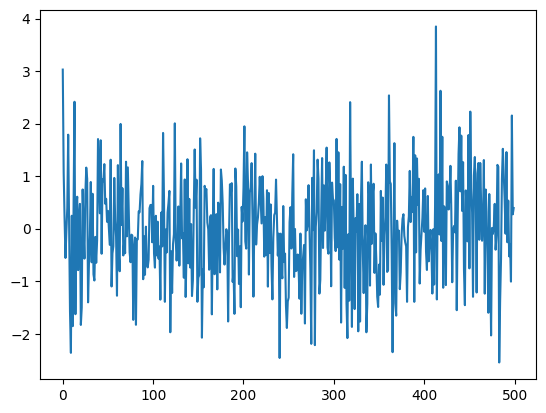

In [23]:
plt.plot(normal)


Тест на стационарность

In [24]:
#Используем Дики-Фуллера
adfuller(normal)

(-22.52458198386052,
 0.0,
 0,
 499,
 {'1%': -3.4435228622952065,
  '5%': -2.867349510566146,
  '10%': -2.569864247011056},
 1332.8350654733995)

p_value<0.05, значит ряд стационарный 

2. Добавляем тренд 

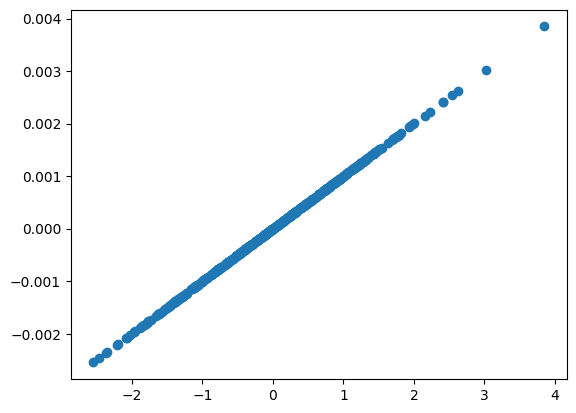

In [26]:
normal_trend = normal*0.001
plt.scatter(normal, normal_trend)


In [31]:
adfuller(normal_trend)

(-22.52458198386052,
 0.0,
 0,
 499,
 {'1%': -3.4435228622952065,
  '5%': -2.867349510566146,
  '10%': -2.569864247011056},
 -5312.425512907416)

p_value<0.05, значит ряд стационарный 

3. а)

In [59]:
df = pd.read_csv('passengers.csv')

In [60]:
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')

Разбиение датасета на 3 части

In [61]:
df1 = df.iloc[0:48]
df2 = df.iloc[48:96]
df3 = df.iloc[96:144]


Среднее значение и дисперсия для каждой части

In [62]:
print('Среднее значение 1 части: ', df1.mean())
print('Дисперсия 1 части:', df1.var())

print('Среднее значение 2 части: ', df2.mean())
print('Дисперсия 2 части:', df2.var())

print('Среднее значение 3 части: ', df3.mean())
print('Дисперсия 3 части:', df3.var())

Среднее значение 1 части:  #Passengers    158.375
dtype: float64
Дисперсия 1 части: #Passengers    1094.664894
dtype: float64
Среднее значение 2 части:  #Passengers    269.041667
dtype: float64
Дисперсия 2 части: #Passengers    3105.998227
dtype: float64
Среднее значение 3 части:  #Passengers    413.479167
dtype: float64
Дисперсия 3 части: #Passengers    6161.999557
dtype: float64


Посмотрев на значения, можем сделать вывод, что со временем среднее значение и дисперсия увеличиваются.

In [68]:
print(adfuller(df1))
print(adfuller(df2))
print(adfuller(df3))


(1.0803926305079248, 0.9950457583072548, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, 298.61064295856863)
(1.9185110378175312, 0.998557225672693, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, 313.91178700799435)
(1.242319826221687, 0.996265619385095, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, 355.26608121950864)


p_value>0.05, значит ряд стационарный 

Логарифмирование

In [64]:
data = np.log(df)

In [65]:
data1 = data.iloc[0:48]
data2 = data.iloc[48:96]
data3 = data.iloc[96:144]


In [66]:
print('Среднее значение 1 части: ', data1.mean())
print('Дисперсия 1 части:', data1.var())

print('Среднее значение 2 части: ', data2.mean())
print('Дисперсия 2 части:', data2.var())

print('Среднее значение 3 части: ', data3.mean())
print('Дисперсия 3 части:', data3.var())


Среднее значение 1 части:  #Passengers    5.043911
dtype: float64
Дисперсия 1 части: #Passengers    0.042901
dtype: float64
Среднее значение 2 части:  #Passengers    5.574733
dtype: float64
Дисперсия 2 части: #Passengers    0.040512
dtype: float64
Среднее значение 3 части:  #Passengers    6.007884
dtype: float64
Дисперсия 3 части: #Passengers    0.0334
dtype: float64


In [69]:
print(adfuller(data1))
print(adfuller(data2))
print(adfuller(data3))


(0.376852345619672, 0.9806083575207788, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, -76.60683895508078)
(1.0987880844196674, 0.9952062660783072, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, -97.52267664019575)
(0.9768249713249467, 0.9940153057426723, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, -91.92370119163482)


p_value>0.05, значит ряд стационарный 

Тест исходных и логарифмированных данных

In [70]:
print(adfuller(df))
print(adfuller(data))


(0.8153688792060482, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
(-1.7170170891069607, 0.42236677477039125, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -445.3990312497209)
